## Observations and Insights 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress




# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview


In [46]:
# Checking the number of mice.
mouse_merge["Mouse ID"].nunique()

249

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#These are all the Mouse that have duplicate row and timepoint 
duplicate_mice= mouse_merge[mouse_merge.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_2=mouse_merge.loc[(mouse_merge["Mouse ID"]=="g989"), :]


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean=mouse_merge.loc[(mouse_merge["Mouse ID"]!="g989"), :]


In [50]:
# Checking the number of mice in the clean DataFrame.
mouse_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Regimen_groupby=mouse_clean.groupby(["Drug Regimen"])
mean=Regimen_groupby["Tumor Volume (mm3)"].mean()
median=Regimen_groupby["Tumor Volume (mm3)"].median()
variance=Regimen_groupby["Tumor Volume (mm3)"].var()
stdev=Regimen_groupby["Tumor Volume (mm3)"].std()
sem=Regimen_groupby["Tumor Volume (mm3)"].sem()

tumor_summary=pd.DataFrame({"Mean": mean, "Median" : median, "Variance": variance, "Standard_Deviation": stdev, "SEM": sem})

tumor_summary
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_2=Regimen_groupby.agg(Mean =('Tumor Volume (mm3)', np.mean), Median=('Tumor Volume (mm3)', np.median), Variance=('Tumor Volume (mm3)', np.var),
                           Standard_Deviation =('Tumor Volume (mm3)', np.std), SEM=('Tumor Volume (mm3)', st.sem))
tumor_2
# This method produces everything in a single groupby function




/Users/dhanyamaheswaran/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/dhanyamaheswaran/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/dhanyamaheswaran/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Bar Chart showing Drug Regimen and Number of Data Points')

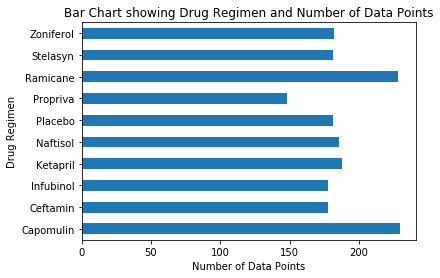

In [53]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_mice=Regimen_groupby["Drug Regimen"].count()
count_chart = count_mice.plot(kind='barh')
count_chart.set_xlabel("Number of Data Points")
count_chart.set_ylabel("Drug Regimen")
count_chart.set_title("Bar Chart showing Drug Regimen and Number of Data Points")



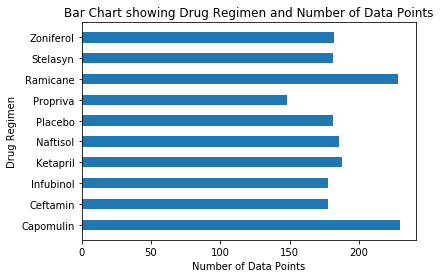

In [54]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#converting count_mice to a dataframe 
count_2=pd.DataFrame({"Number of Data Points" : count_mice})
count_2=count_2.reset_index()
plt.barh(count_2["Drug Regimen"], count_2["Number of Data Points"],height=0.5)
plt.xlabel('Number of Data Points')
plt.ylabel('Drug Regimen')
plt.title('Bar Chart showing Drug Regimen and Number of Data Points')

plt.show()

 

Text(0.5, 1.0, 'Gender Distribution of Mice')

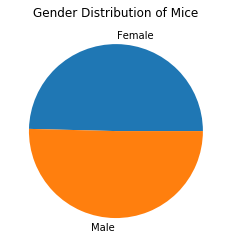

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#using groupby function
mouse_group=mouse_clean.groupby(["Sex"])
gender=mouse_group["Mouse ID"].nunique()
pie_chart = gender.plot(kind='pie')
pie_chart.set_ylabel("")
pie_chart.set_title("Gender Distribution of Mice")

#change the labels 




Text(0.5, 1.0, 'Gender Distribution of Mice')

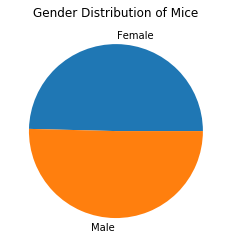

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender1=["Female", "Male"]
plt.pie(gender,labels=gender1)
plt.title("Gender Distribution of Mice")

#change labels 

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Used a slightly different approach, ordered by Mouse ID and Timepoint and then only kept the last timepoint
mouse_1= mouse_clean.sort_values(['Mouse ID','Timepoint'])
mouse_1=mouse_1.drop_duplicates(subset ="Mouse ID", keep = "last")
mouse_1.head()
#using loc to get the most promising drug treatments


mouse_Capomulin=mouse_1.loc[(mouse_1["Drug Regimen"] == "Capomulin"), :] 
mouse_Ramicane=mouse_1.loc[(mouse_1["Drug Regimen"] == "Ramicane"), :] 
mouse_Infubinol=mouse_1.loc[(mouse_1["Drug Regimen"] == "Infubinol"), :]
mouse_Ceftamin=mouse_1.loc[(mouse_1["Drug Regimen"] == "Ceftamin"), :]


In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Capomulin = mouse_Capomulin['Tumor Volume (mm3)']
quartiles = Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq} for Capomulin Treatment")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq} for Capomulin Treatment")
print(f"The the median of Tumor Volume (mm3)is: {quartiles[0.5]} for Capomulin Treatment")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr} for Capomulin Treatment")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'The outlier lower boundary is {lower_bound} and the outlier upper boundary for Capomulin Treatment is {upper_bound}')


print(f"Values below {lower_bound} could be outliers for Capomulin Treatment.")
print(f"Values above {upper_bound} could be outliers for Capomulin Treatment.")

min=mouse_Capomulin['Tumor Volume (mm3)'].min()
max=mouse_Capomulin['Tumor Volume (mm3)'].max()

print(f'The minimum Tumor Volume of Capomulin treatment is {min} and the maximum Tumor Volume is {max}. These are both within the upper and lower bound identified above, so there are no potential outliers for this treatment')


The lower quartile of Tumor Volume (mm3) is: 32.37735684 for Capomulin Treatment
The upper quartile of Tumor Volume (mm3) is: 40.1592203 for Capomulin Treatment
The the median of Tumor Volume (mm3)is: 38.125164399999996 for Capomulin Treatment
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004 for Capomulin Treatment
The outlier lower boundary is 20.70456164999999 and the outlier upper boundary for Capomulin Treatment is 51.83201549
Values below 20.70456164999999 could be outliers for Capomulin Treatment.
Values above 51.83201549 could be outliers for Capomulin Treatment.
The minimum Tumor Volume of Capomulin treatment is 23.34359787 and the maximum Tumor Volume is 47.68596303. These are both within the upper and lower bound identified above, so there are no potential outliers for this treatmennt


In [73]:
Ramicane = mouse_Ramicane['Tumor Volume (mm3)']


quartiles = Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq} for Ramicane Treatment")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq} for Ramicane  Treatment")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr} for Ramicane Treatment")
print(f"The the median of Tumor Volume (mm3)is: {quartiles[0.5]} for Ramicane Treatment")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f' The outlier lower boundary is {lower_bound} and the outlier upper boundary for Ramicane Treatment is {upper_bound}')

print(f"Values below {lower_bound} could be outliers for Ramicane Treatment.")
print(f"Values above {upper_bound} could be outliers for Ramicane Treatment.")


min=mouse_Ramicane['Tumor Volume (mm3)'].min()
max=mouse_Ramicane['Tumor Volume (mm3)'].max()

print(f'The minimum Tumor Volume of Ramicane treatment is {min} and the maximum Tumor Volume is {max}. These are both within the upper and lower bound identified above, so there are no potential outliers for this treatment')


The lower quartile of Tumor Volume (mm3) is: 31.56046955 for Ramicane Treatment
The upper quartile of Tumor Volume (mm3) is: 40.65900627 for Ramicane  Treatment
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998 for Ramicane Treatment
The the median of Tumor Volume (mm3)is: 36.56165229 for Ramicane Treatment
 The outlier lower boundary is 17.912664470000003 and the outlier upper boundary for Ramicane Treatment is 54.30681135
Values below 17.912664470000003 could be outliers for Ramicane Treatment.
Values above 54.30681135 could be outliers for Ramicane Treatment.
The minimum Tumor Volume of Ramicane treatment is 22.05012627 and the maximum Tumor Volume is 45.22086888. These are both within the upper and lower bound identified above, so there are no potential outliers for this treatment


In [96]:
Infubinol = mouse_Infubinol['Tumor Volume (mm3)']


quartiles = Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq} for Infubinol Treatment")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq} for Infubinol Treatment")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr} for Infubinol Treatment")
print(f"The the median of Tumor Volume (mm3)is: {quartiles[0.5]} for Infubinol Treatment")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'The outlier lower boundary is {lower_bound} and the outlier upper boundary for Infubinol Treatment is {upper_bound}')


print(f"Values below {lower_bound} could be outliers for Infubinol Treatment.")
print(f"Values above {upper_bound} could be outliers for Infubinol Treatment.")


min=mouse_Infubinol['Tumor Volume (mm3)'].min()
max=mouse_Infubinol['Tumor Volume (mm3)'].max()


print(f'The minimum Tumor Volume of Infubinol treatment is {min} and the maximum Tumor Volume is {max}. While there are no potential upper outliers, the minimum is lower than the lower bound, and thus there is a potential outlier of {min} ')

#sorting values to see if there are any other potential outliers 
mouse_Infubinol2 = mouse_Infubinol.sort_values(
    "Tumor Volume (mm3)")

mouse_Infubinol2.head()

print(f'From sorting the values the next highest Tumor Volume for the Infubinol treatment is 45.699, which is within the lower bound and thus thers is only one potential outlier of {min}')



The lower quartile of Tumor Volume (mm3) is: 54.04860769 for Infubinol Treatment
The upper quartile of Tumor Volume (mm3) is: 65.52574285 for Infubinol Treatment
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003 for Infubinol Treatment
The the median of Tumor Volume (mm3)is: 60.16518046 for Infubinol Treatment
The outlier lower boundary is 36.83290494999999 and the outlier upper boundary for Infubinol Treatment is 82.74144559000001
Values below 36.83290494999999 could be outliers for Infubinol Treatment.
Values above 82.74144559000001 could be outliers for Infubinol Treatment.
The minimum Tumor Volume of Infubinol treatment is 36.321345799999996 and the maximum Tumor Volume is 72.2267309. While there are no potential upper outliers, the minimum is lower than the lower bound, and thus there is a potential outlier of 36.321345799999996 
From sorting the values the next highest Tumor Volume for the Infubinol treatment is 45.699, which is within the lower bound and thus 

In [104]:
Ceftamin = mouse_Ceftamin['Tumor Volume (mm3)']


quartiles = Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq} for Ceftamin Treatment")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq} for Ceftamin Treatment")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr} for Ceftamin Treatment")
print(f"The the median of Tumor Volume (mm3)is: {quartiles[0.5]} for Ceftamin Treatment")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f'The outlier lower boundary is {lower_bound} and the outlier upper boundary for Ceftamin Treatment is {upper_bound} and')


print(f"Values below {lower_bound} could be outliers for Ceftamin Treatment.")
print(f"Values above {upper_bound} could be outliers for Ceftamin Treatment.")

min=mouse_Ceftamin['Tumor Volume (mm3)'].min()
max=mouse_Ceftamin['Tumor Volume (mm3)'].max()


print(f'The minimum Tumor Volume of Ceftamin treatment is {min} and the maximum Tumor Volume is {max}. These are both within the upper and lower bound identified above, so there are no potential outliers for this treatment')


The lower quartile of Tumor Volume (mm3) is: 48.72207785 for Ceftamin Treatment
The upper quartile of Tumor Volume (mm3) is: 64.29983003 for Ceftamin Treatment
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997 for Ceftamin Treatment
The the median of Tumor Volume (mm3)is: 59.85195552 for Ceftamin Treatment
The outlier lower boundary is 25.355449580000002 and the outlier upper boundary for Ceftamin Treatment is 87.66645829999999 and
Values below 25.355449580000002 could be outliers for Ceftamin Treatment.
Values above 87.66645829999999 could be outliers for Ceftamin Treatment.
The minimum Tumor Volume of Ceftamin treatment is 45.0 and the maximum Tumor Volume is 68.92318457. These are both within the upper and lower bound identified above, so there are no potential outliers for this treatment


{'whiskers': [<matplotlib.lines.Line2D at 0x1a25f5ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a25f5e210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a25f5ec90>,
 'medians': [<matplotlib.lines.Line2D at 0x1a25f6c610>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a25f6cb10>,
 'means': []}

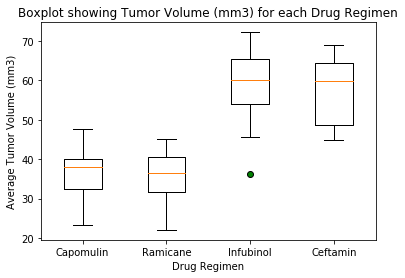

In [100]:
#change the colour of the outliers 
green_circle = dict(markerfacecolor='g')
Drug_regimen=[]

Drug_regimen=[Capomulin, Ramicane, Infubinol, Ceftamin]
fig7, ax7 = plt.subplots()
ax7.set_title('Boxplot showing Tumor Volume (mm3) for each Drug Regimen')
ax7.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.xlabel('Drug Regimen')
plt.ylabel('Average Tumor Volume (mm3)')
ax7.boxplot(Drug_regimen, flierprops=green_circle,)


## Line and Scatter Plots

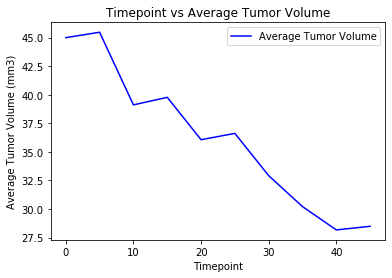

In [92]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Randomly selecting a mouse treated with Capomulin
#first getting all mice that have Capomulin from cleaned dataset 
Capomulin_all=mouse_clean.loc[(mouse_clean["Drug Regimen"]=="Capomulin"), :]

#picked mouse x401 that has been treated with Capomulin
#label y axis
x401=mouse_clean.loc[(mouse_clean["Mouse ID"]=="x401"), ["Timepoint", "Tumor Volume (mm3)"]]

x_values = x401['Timepoint']
y_values = x401['Tumor Volume (mm3)']
tumor_vol=plt.plot(x_values,y_values,color="blue", label="Average Tumor Volume")
plt.xlabel('Timepoint')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Timepoint vs Average Tumor Volume')
plt.legend()
plt.show()



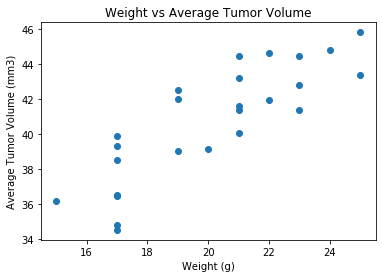

In [93]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#average obtained by summing up total tumor volume and dividing by number of timepoints
mouse_id_group=Capomulin_all.groupby(["Mouse ID"])
tumor_vol=mouse_id_group["Tumor Volume (mm3)"].sum()
time=mouse_id_group["Timepoint"].count()
weight=mouse_id_group["Weight (g)"].unique()
average=tumor_vol/time

average_weight=pd.DataFrame({"Weight":weight, "Average Tumor Volume (mm3)":average})
average_weight['Weight'] = average_weight['Weight'].astype(int)

x_values = average_weight['Weight']
y_values = average_weight['Average Tumor Volume (mm3)']

plt.scatter(x_values,y_values)
plt.title('Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [94]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "Average Tumor Volume= " + str(round(slope,2)) + "Weight + " + str(round(intercept,2))
print(f'The equation of the line is {line_eq}')
correlation_coeff=y_values.corr(x_values)
print(f' The correlation coefficient for this equation is {correlation_coeff}')

The equation of the line is Average Tumor Volume= 0.95Weight + 21.55
 The correlation coefficient for this equation is 0.8419363424694717


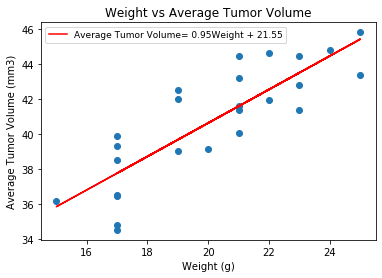

In [95]:

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-",label=line_eq,)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume')
plt.legend(fontsize=9)
plt.show()

3 insights about the data: 

From the four boxplots it is evident that at the conclusion of the study (the last Timepoint measured), mice who were treated with either Capomulin or Ramicane seemed to have the lowest Tumor Volume and median tumor volume as compared to mice who were treated with Ifubinol and Ceptamine. Furthermore, the boxplots also show the InterQuartile Range (IQR) which assesses the range of the middle 50% of the data. This is a good measure of spread as unlike the range it is not affected by extreme values. The data above demonstrates that the Capomulin treatment has the lowest interquartile range of only (7.8). In other words, the difference between the range of tumor volume experienced by the middle 50% of mice who were treated with Capomulin was only 7.7. The Ramicane treatment similarly had a low IQR of 9.09, while the Infubinol and Ceptamin treatment had higher IQRs of 11.47 and 15.58 respectively. This indicates that the Capomulin treatment and Ramicane treatment generally had more consistent results in regards to the final tumor volume experienced by mice as compared to the Infubinol and Ceptamin treatment. Furthermore, when assessing the Average Tumor Volume in comparison to weight it is evident that the Weight of the Mouse and the Average Tumor Volume seem to have a very high linear correlation. In other words, mouse that weight more have a higher average tumor volume. While this correlation does not necessarily imply causation, it is still important for researchers to consider that weight may have an effect on the Average Tumor Volume experienced by mice. Thus in further trials assessing the effectivness of drugs in reducing the Tumor Volume, researchers should randomise the weight of mice that are treated by each drug. 

